# EDA

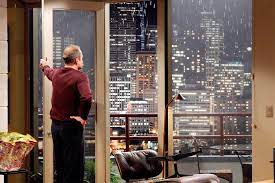

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#import data
df_housing = pd.read_csv('data/eda.csv')

In [3]:
df_housing.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [4]:
#drop id (not needed because of index)
df_housing.pop('id')
#drop id.1 because duplicate of house_id
df_housing.pop('id.1')
#drop other irrelevant columns (regarding this eda)
df_housing.pop('sqft_basement')
df_housing.pop('waterfront')
df_housing.pop('sqft_above')
df_housing.pop('yr_renovated')
df_housing.head()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,0.000,3,7,1955,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,3,7,1951,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,3,6,1933,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,5,7,1965,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,3,8,1987,98074,47.617,-122.045,1800.000,7503.000


In [67]:
#check rest of columns for spelling, datatype, missing values, duplicates
df_housing.info()
df_housing.duplicated().value_counts()
df_housing['price'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   house_id       21597 non-null  int64         
 3   bedrooms       21597 non-null  Int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  float64       
 6   sqft_lot       21597 non-null  float64       
 7   floors         21597 non-null  float64       
 8   view           21534 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  yr_built       21597 non-null  int64         
 12  zipcode        21597 non-null  int64         
 13  lat            21597 non-null  float64       
 14  long           21597 non-null  float64       
 15  sqft_living15  2159

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [7]:
#change date to datetime format
df_housing['date'] = pd.to_datetime(df_housing['date'], format='%Y-%m-%d')

#Convert others to integer
df_housing['bedrooms'] = df_housing['bedrooms'].astype('Int64')


In [31]:
df_housing.nunique()

date               372
price             3622
house_id         21420
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
view                 5
condition            5
grade               11
yr_built           116
zipcode             70
lat               5033
long               752
sqft_living15      777
sqft_lot15        8682
year_month          13
dtype: int64

In [32]:
#Based on research what is considered a central, lively area: zipcodes, industrial districts excluded (e.g. Georgetown)
central_zipcodes = [
     98101, 98104,  # Downtown Seattle
    98102,         # Capitol Hill
    98121,         # Belltown
    98109,         # South Lake Union
    98103,         # Fremont, Greenwood
    98105,         # University District (U District), Ravenna
    98119,         # Queen Anne
    98107,         # Ballard
    98116, 98126, 98136, 98146, 98106,  # West Seattle
    98118,         # Columbia City, Beacon Hill
    98112,         # Madison Park
    98199,         # Magnolia
    98122,         # Leschi
    98104,         # International District/Chinatown
    98101, 98104,  # First Hill
    98144 
]

 # Filter the DataFrame for these zipcodes
df_central =df_housing[df_housing['zipcode'].isin(central_zipcodes)]

# Create a dictionary mapping zip codes to district names
zip_to_district = {
    98101: 'Downtown Seattle',
    98104: 'Downtown Seattle',
    98102: 'Capitol Hill',
    98121: 'Belltown',
    98109: 'South Lake Union',
    98103: 'Fremont, Greenwood',
    98105: 'University District',
    98119: 'Queen Anne',
    98107: 'Ballard',
    98116: 'West Seattle',
    98126: 'West Seattle',
    98136: 'West Seattle',
    98146: 'West Seattle',
    98106: 'West Seattle',
    98118: 'Columbia City',
    98112: 'Madison Park',
    98199: 'Magnolia',
    98122: 'Leschi',
    98144: 'Mount Baker, Beacon Hill'
}

# Map zip codes to district names and create new column
df_central['district'] = df_central['zipcode'].map(zip_to_district)

df_central.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4790 entries, 3 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4790 non-null   datetime64[ns]
 1   price          4790 non-null   float64       
 2   house_id       4790 non-null   int64         
 3   bedrooms       4790 non-null   Int64         
 4   bathrooms      4790 non-null   float64       
 5   sqft_living    4790 non-null   float64       
 6   sqft_lot       4790 non-null   float64       
 7   floors         4790 non-null   float64       
 8   view           4775 non-null   float64       
 9   condition      4790 non-null   int64         
 10  grade          4790 non-null   int64         
 11  yr_built       4790 non-null   int64         
 12  zipcode        4790 non-null   int64         
 13  lat            4790 non-null   float64       
 14  long           4790 non-null   float64       
 15  sqft_living15  4790 non-n

In [33]:
import plotly.graph_objects as go

# Define a color dictionary mapping each district to a specific color
color_dict = {
    'Downtown Seattle': '#8CBED6',   # Light blue
    'Capitol Hill': '#FFB3BA',       # Light pink
    'Belltown': '#9AD1D4',           # Light turquoise
    'South Lake Union': '#FFD966',    # Light yellow
    'Fremont, Greenwood': '#B4EEB4', # Light green
    'University District': '#B19CD9', # Light purple
    'Queen Anne': '#FF9999',         # Light red
    'Ballard': '#FFCC99',            # Light orange
    'West Seattle': '#99FF99',       # Light green
    'Columbia City': '#FFCCFF',      # Light pink
    'Madison Park': '#C2DFFF',       # Light blue
    'Magnolia': '#FFD1DC',           # Light pink
    'Leschi': '#99FFFF',             # Light turquoise
    'Mount Baker, Beacon Hill': '#FFB347'  # Light orange
}

# Create a scattermapbox trace
trace = go.Scattermapbox(
    lat=df_central['lat'],
    lon=df_central['long'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=10,
        color=[color_dict[district] for district in df_central['district']],  # Assign colors based on district
        opacity=0.5,
    ),

    #Customize the text displayed when hovering over the markers
    hoverinfo='text',
    text=df_central.apply(lambda df_central: f"District: {df_central['district']}, Price: ${df_central['price']}, Bedrooms: {df_central['bedrooms']}, Bathrooms: {df_central['bathrooms']}", axis=1),
    
    # Hide the trace from the legend
    showlegend=False
)

# Create traces for the legend items
legend_traces = []
for district, color in color_dict.items():
    legend_traces.append(go.Scattermapbox(
        lat=[None],
        lon=[None],
        mode='markers',
        marker=dict(
            size=10,
            color=color,
            opacity=0.9
        ),
        showlegend=True,
        legendgroup=district,
        name=district
    ))

# Create layout with mapbox style
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='open-street-map',  # You can choose different map styles here
        center=dict(
            lat=sum(df_central['lat']) / len(df_central['lat']),
            lon=sum(df_central['long']) / len(df_central['long'])
        ),
       zoom=10,
    ),
    # Set the height and width of the map
    height=800,  # Adjust as needed
    width=800,    # Adjust as needed
    showlegend=True  # Show the legend
)

# Create figure and add traces
fig = go.Figure(data=[trace, *legend_traces], layout=layout)

# Show the figure
fig.show()

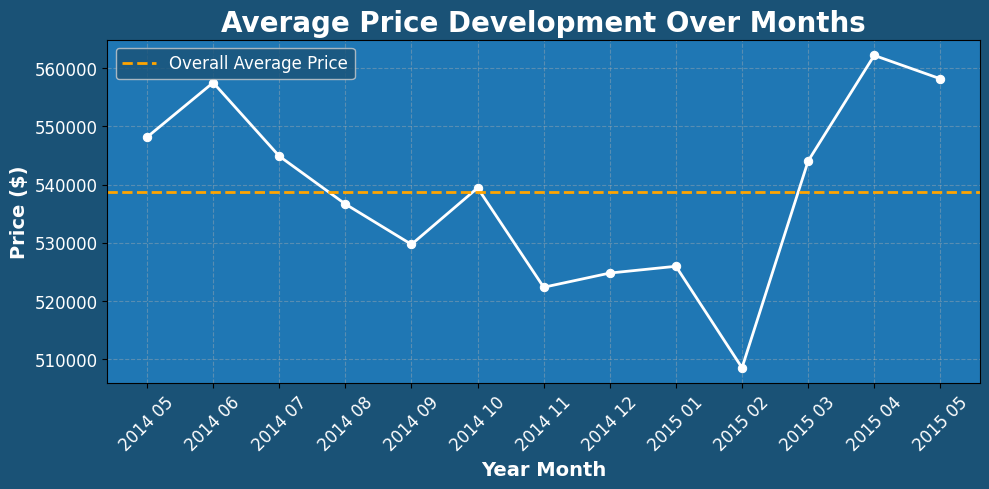

<Figure size 800x500 with 0 Axes>

In [59]:
# add new column to display year and month
df_housing['year_month'] = df_housing['date'].dt.strftime('%Y-%m')
df_housing['year_month']

# Calculate averagee per month
sum_prices_per_date = df_housing.groupby('year_month')['price'].mean().reset_index()

# Calculate overall average
overall_average_price = sum_prices_per_date['price'].mean()

# Plotting the data using Seaborn with custom styling
plt.figure(figsize=(10, 5),facecolor='#1A5276')

ax = sns.lineplot(data=sum_prices_per_date, x='year_month', y='price', marker='o', linestyle='-', color='#FFFFFF', linewidth=2)

# Change background color of the plot area
ax.set_facecolor('#1f77b4')

plt.axhline(overall_average_price, color='#FFA500', linestyle='--', label='Overall Average Price', linewidth=2)  # Adding overall average line
plt.title('Average Price Development Over Months', fontsize=20, fontweight='bold', color='#FFFFFF')  # Increase title font size and weight
plt.xlabel('Year Month', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase x-axis label font size
plt.ylabel('Price ($)', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase y-axis label font size
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6,6))  # Formatting y-axis tick labels without offset
plt.legend(fontsize=12,facecolor='#1A5276', labelcolor='#FFFFFF')  # Increase legend font size
plt.xticks(rotation=45, fontsize=12, color='#FFFFFF')  # Rotate x-axis labels and increase font size
plt.yticks(fontsize=12, color='#FFFFFF')  # Increase y-axis tick font size
plt.grid(True, linestyle='--', alpha=0.4)  # Add grid lines with dashed style and reduced opacity
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Customize x-axis labels to remove "-"
plt.gca().set_xticklabels([label.replace("-", " ") for label in sum_prices_per_date['year_month']])

plt.show()

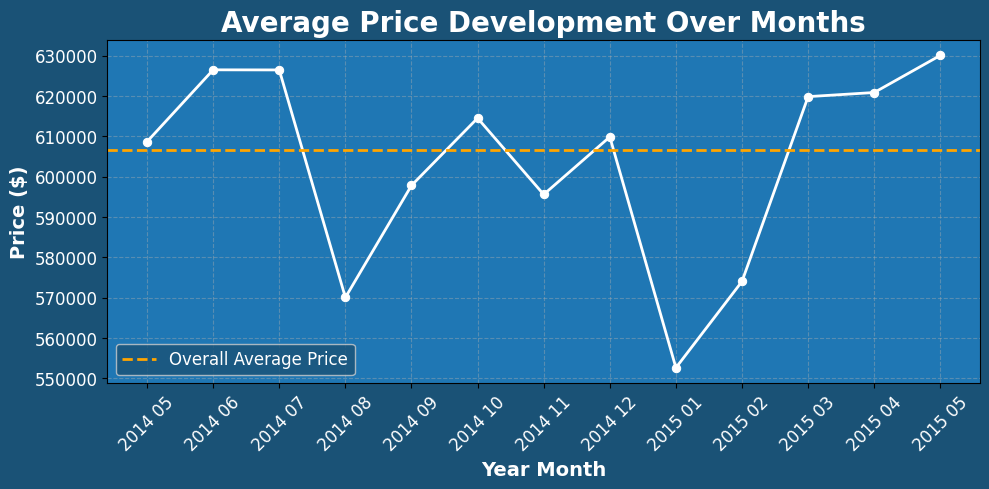

<Figure size 800x500 with 0 Axes>

In [60]:
# Calculate monthly average in central location 
mean_prices_month_central = df_central.groupby('year_month')['price'].mean().reset_index()

# Calculate overall average in central location 
overall_average_price_central = df_central['price'].mean()

# Calculate district average in central location 
mean_prices_distirct_central = df_central.groupby('district')['price'].mean().sort_values().reset_index()

# Calculate district median in central location 
median_prices_distirct_central = df_central.groupby('district')['price'].median().sort_values().reset_index()

# Calculate overall average in central location 
overall_median_price_central =df_central['price'].median()

# Plotting the data using Seaborn with custom styling
plt.figure(figsize=(10, 5),facecolor='#1A5276')

ax = sns.lineplot(data=mean_prices_month_central, x='year_month', y='price', marker='o', linestyle='-', color='#FFFFFF', linewidth=2)

# Change background color of the plot area
ax.set_facecolor('#1f77b4')

plt.axhline(overall_average_price_central, color='#FFA500', linestyle='--', label='Overall Average Price', linewidth=2)  # Adding overall average line
plt.title('Average Price Development Over Months', fontsize=20, fontweight='bold', color='#FFFFFF')  # Increase title font size and weight
plt.xlabel('Year Month', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase x-axis label font size
plt.ylabel('Price ($)', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase y-axis label font size
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6,6))  # Formatting y-axis tick labels without offset
plt.legend(fontsize=12,facecolor='#1A5276', labelcolor='#FFFFFF')  # Increase legend font size
plt.xticks(rotation=45, fontsize=12, color='#FFFFFF')  # Rotate x-axis labels and increase font size
plt.yticks(fontsize=12, color='#FFFFFF')  # Increase y-axis tick font size
plt.grid(True, linestyle='--', alpha=0.4)  # Add grid lines with dashed style and reduced opacity
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Customize x-axis labels to remove "-"
plt.gca().set_xticklabels([label.replace("-", " ") for label in mean_prices_month_central['year_month']])

plt.show()

In [508]:
df_central.describe()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,4790,4790.000,4790.000,4790.000,4790.000,4790.000,4790.000,4790.000,4775.000,4790.000,4790.000,4790.000,4790.000,4790.000,4790.000,4790.000,4790.000
mean,2014-10-30 08:29:51.732776704,606669.377,4599013169.464,3.141,1.967,1813.825,4897.128,1.582,0.330,3.428,7.473,1953.067,98123.782,47.599,-122.342,1691.287,4750.788
min,2014-05-02 00:00:00,82000.000,3600057.000,1.000,0.500,390.000,520.000,1.000,0.000,1.000,4.000,1900.000,98102.000,47.481,-122.416,620.000,651.000
25%,2014-07-21 00:00:00,379962.500,2029036910.750,2.000,1.000,1240.000,3000.000,1.000,0.000,3.000,7.000,1922.000,98106.000,47.548,-122.377,1350.000,3500.000
50%,2014-10-19 12:00:00,521225.000,3812400556.000,3.000,2.000,1630.000,4635.500,1.500,0.000,3.000,7.000,1946.000,98118.000,47.598,-122.350,1575.000,4800.000
75%,2015-02-19 00:00:00,705000.000,7432800100.000,4.000,2.500,2206.000,6000.000,2.000,0.000,4.000,8.000,1996.000,98136.000,47.651,-122.301,1900.000,6000.000
max,2015-05-14 00:00:00,7700000.000,9842300540.000,33.000,8.000,12050.000,91681.000,3.500,4.000,5.000,13.000,2015.000,98199.000,47.701,-122.249,4950.000,34713.000
std,NaN,387926.296,2954678455.968,1.119,0.821,839.428,3606.151,0.614,0.876,0.713,1.083,36.961,24.141,0.058,0.042,533.592,2489.733


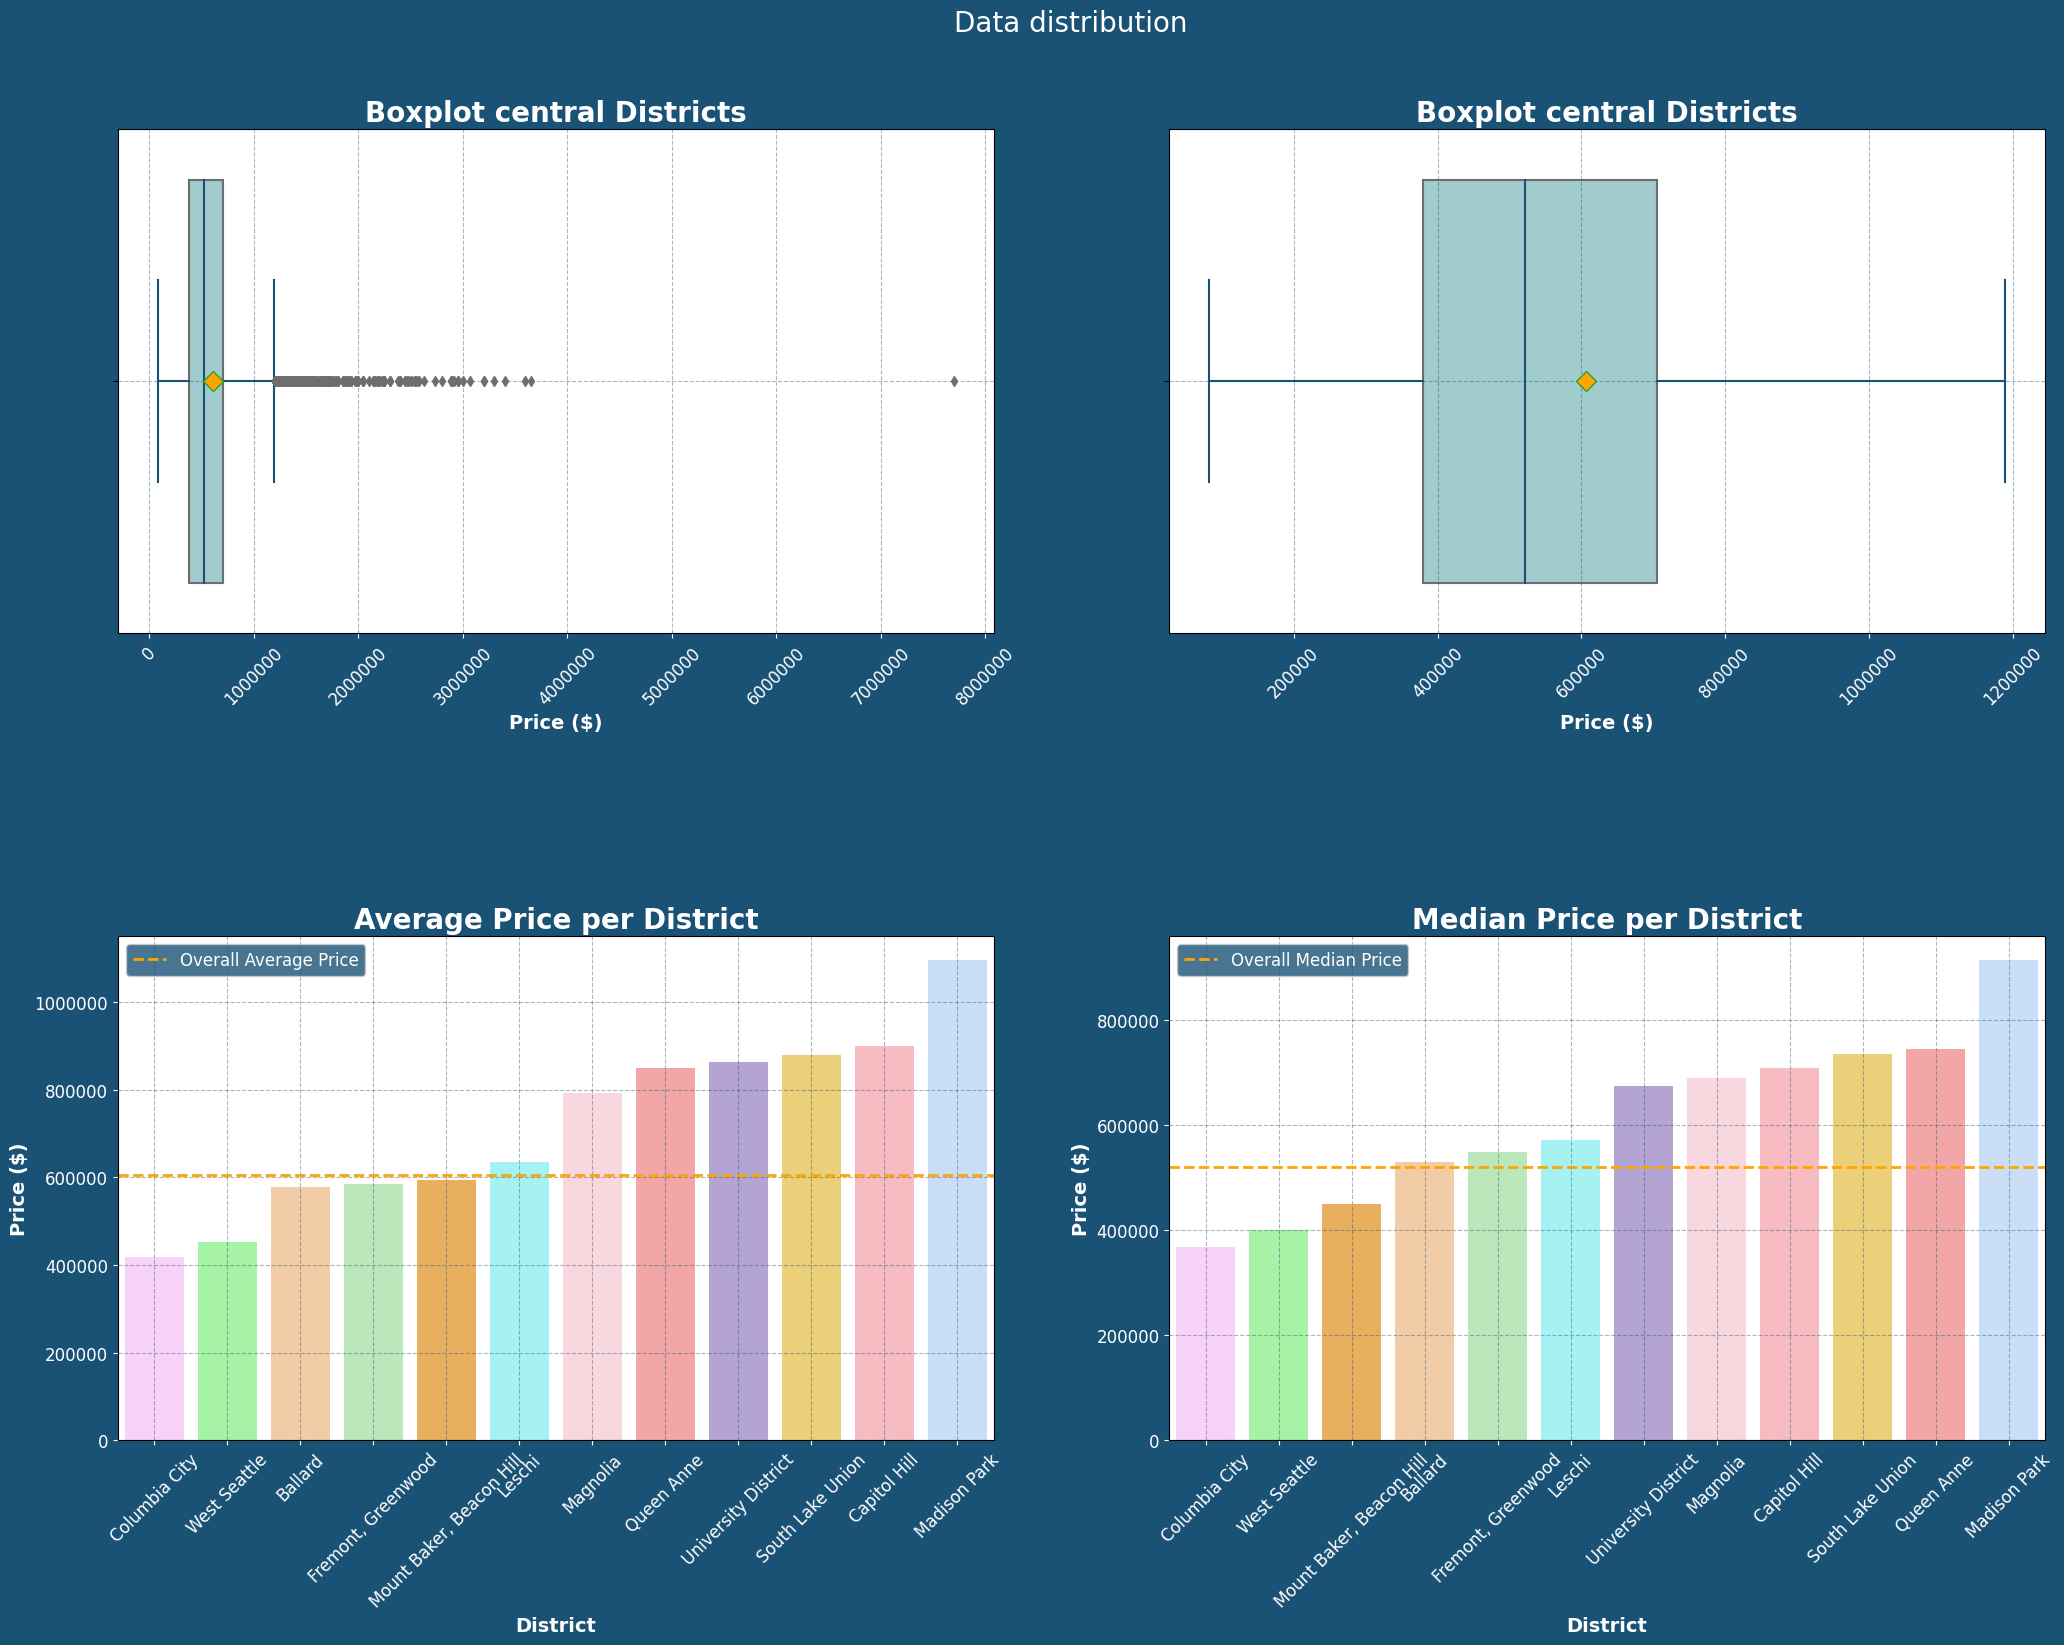

In [63]:
# Plot mean & median price per district
fig, ax = plt.subplots(2,2, figsize=(20,15),facecolor='#1A5276') # create subplots on 2 rows and 2 columns
plt.suptitle('Data distribution', fontsize=20, color='#FFFFFF') 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots


# Plotting the data with custom styling
f1 = sns.barplot(data=mean_prices_distirct_central,x='district', y='price', palette=color_dict, ax=ax[1,0])
#styling 
f1.set_facecolor('#FFFFFF')
f1.axhline(overall_average_price_central, color='#FFA500', linestyle='--', label='Overall Average Price', linewidth=2)  # Adding overall average line
f1.set_title('Average Price per District', fontsize=20, fontweight='bold', color='#FFFFFF')  # Increase title font size and weight
f1.set_xlabel('District', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase x-axis label font size
f1.set_ylabel('Price ($)', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase y-axis label font size
f1.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6,6))  # Formatting y-axis tick labels without offset
f1.legend(fontsize=12,facecolor='#1A5276', labelcolor='#FFFFFF')  # Increase legend font size
f1.tick_params(axis='x', labelrotation=45, labelsize=12, colors='#FFFFFF')
f1.tick_params(axis='y', labelsize=12, colors='#FFFFFF')  # Adjust y-axis labels
f1.grid(True, linestyle='--', color='#1A5276',alpha=0.4)  # Add grid lines with dashed style and reduced opacity

# Plotting the data with custom styling
f2 = sns.barplot(data=median_prices_distirct_central,x='district', y='price', palette=color_dict, ax=ax[1,1])
#styling 
f2.set_facecolor('#FFFFFF')
f2.axhline(overall_median_price_central, color='#FFA500', linestyle='--', label='Overall Median Price', linewidth=2)  # Adding overall average line
f2.set_title('Median Price per District', fontsize=20, fontweight='bold', color='#FFFFFF')  # Increase title font size and weight
f2.set_xlabel('District', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase x-axis label font size
f2.set_ylabel('Price ($)', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase y-axis label font size
f2.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6,6))  # Formatting y-axis tick labels without offset
f2.legend(fontsize=12,facecolor='#1A5276', labelcolor='#FFFFFF')  # Increase legend font size
f2.tick_params(axis='x', labelrotation=45, labelsize=12, colors='#FFFFFF')
f2.tick_params(axis='y', labelsize=12, colors='#FFFFFF')  # Adjust y-axis labels
f2.grid(True, linestyle='--', color='#1A5276',alpha=0.4)  # Add grid lines with dashed style and reduced opacity

# Plotting the data with custom styling
f3 = sns.boxplot(x=df_central['price'], showmeans=True, color='#9AD1D4',
            whiskerprops={'color': '#1A5276'},
            capprops={'color': '#1A5276'},
            medianprops={'color': '#1A5276'}, meanprops=dict(markerfacecolor='#FFA500', marker='D', markersize=10, linestyle=''), ax=ax[0,0])

f3.set_facecolor('#FFFFFF')
f3.set_title('Boxplot central Districts', fontsize=20, fontweight='bold', color='#FFFFFF')  # Increase title font size and weight
f3.set_xlabel('Price ($)', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase y-axis label font size
f3.ticklabel_format(style='plain', axis='x', useOffset=False, scilimits=(6,6))  # Formatting y-axis tick labels without offset
f3.tick_params(axis='x', labelrotation=45, labelsize=12, colors='#FFFFFF')
f3.grid(True, linestyle='--', color='#1A5276',alpha=0.4)  # Add grid lines with dashed style and reduced opacity

# Plotting the data with custom styling
f4 = sns.boxplot(x=df_central['price'], showfliers=False, showmeans=True, color='#9AD1D4',
            whiskerprops={'color': '#1A5276'},
            capprops={'color': '#1A5276'},
            medianprops={'color': '#1A5276'}, meanprops=dict(markerfacecolor='#FFA500', marker='D', markersize=10, linestyle=''), ax=ax[0,1])

f4.set_facecolor('#FFFFFF')
f4.set_title('Boxplot central Districts', fontsize=20, fontweight='bold', color='#FFFFFF')  # Increase title font size and weight
f4.set_xlabel('Price ($)', fontsize=14, fontweight='bold', color='#FFFFFF')  # Increase y-axis label font size
f4.ticklabel_format(style='plain', axis='x', useOffset=False, scilimits=(6,6))  # Formatting y-axis tick labels without offset
f4.tick_params(axis='x', labelrotation=45, labelsize=12, colors='#FFFFFF')
f4.grid(True, linestyle='--', color='#1A5276',alpha=0.4)  # Add grid lines with dashed style and reduced opacity



In [80]:
#df_central_middle = df_central[(df_central['price'] > df_central['price'].quantile(0.25)) & (df_central['price'] < df_central['price'].quantile(0.75))]

df_central['price'].quantile(0.25)
df_central['price'].quantile(0.75)

# correlation matrix between variables
corr_columns=["price", "sqft_living", "condition","grade"]
corr_mtrx=df_central[corr_columns].corr()
display(corr_mtrx)

df_central_price = pd.DataFrame(df_central['price'])

#Grade 7 or higher (avarage or higher), above average sqft_living, condition 4 or 5
df_central_price_middle = pd.DataFrame(df_central['price'][(df_central['grade'] > 7) & (df_central['sqft_living'] > 1240) & (df_central['sqft_living'] < 2206) & (df_central['condition'] > 2)])

#Display discriptive statistics for central location and central location with criteria
display(df_central_price.describe(), df_central_price_middle.describe())

,price,sqft_living,condition,grade
price,1.000,0.780,0.196,0.704
sqft_living,0.780,1.000,0.172,0.664
condition,0.196,0.172,1.000,0.000
grade,0.704,0.664,0.000,1.000


,price
count,4790.000
mean,606669.377
std,387926.296
min,82000.000
25%,379962.500
50%,521225.000
75%,705000.000
max,7700000.000


,price
count,975.000
mean,606413.575
std,195095.765
min,239800.000
25%,465000.000
50%,580000.000
75%,714250.000
max,1570000.000


In [78]:
#Descriptive satistics for Mount Baker, Beacon Hill, most central, below overall median

df_central[(df_central['grade'] > 7) & (df_central['sqft_living'] > 1240) & (df_central['sqft_living'] < 2206) & (df_central['condition'] > 2) & (df_central['district'] == 'Mount Baker, Beacon Hill')]['price'].describe() 





count       55.000
mean    517978.182
std     127331.639
min     329950.000
25%     429450.000
50%     500000.000
75%     586500.000
max     880000.000
Name: price, dtype: float64